<a href="https://colab.research.google.com/github/Ilmif/ds_bangalore/blob/main/Predict_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lazypredict
!pip3 install pandas --upgrade

     |████████████████████████████████| 269 kB 8.8 MB/s 
     |████████████████████████████████| 248 kB 34.0 MB/s 
     |████████████████████████████████| 25.9 MB 2.8 MB/s 
     |████████████████████████████████| 302 kB 5.8 MB/s 
     |████████████████████████████████| 10.1 MB 44.6 MB/s 
     |████████████████████████████████| 6.8 MB 27.3 MB/s 
     |████████████████████████████████| 127.6 MB 24 kB/s 
     |████████████████████████████████| 14.5 MB 39.9 MB/s 
     |████████████████████████████████| 1.2 MB 60.2 MB/s 
     |████████████████████████████████| 72 kB 795 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=05855efb6455ba8d55694381039c0cdbfd561fea94873b385e69187c71244a36
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully un

     |████████████████████████████████| 11.3 MB 8.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.3.5 which is incompatible.


# Prediksi Diagnosis Penyakit Jantung

### Import Library dan Import Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#mengedit parameter defaul matlpotlib
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
rcParams["lines.linewidth"] = 3
rcParams["xtick.labelsize"] = "x-large"
rcParams["ytick.labelsize"] = "x-large"
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
data =pd.read_csv("heart_4.csv", delimiter=";", na_values='?')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130.00,322.00,0.00,2.00,109.00,0.00,2.40,2.00,3.00,3.00,1
1,67,0,3,115.00,564.00,0.00,2.00,160.00,0.00,1.60,2.00,0.00,7.00,0
2,57,1,2,124.00,261.00,0.00,0.00,141.00,0.00,0.30,1.00,0.00,7.00,1
3,64,1,4,128.00,263.00,0.00,0.00,105.00,1.00,0.20,2.00,1.00,7.00,0
4,74,0,2,120.00,269.00,0.00,2.00,121.00,1.00,0.20,1.00,1.00,3.00,0


## EDA dan Insight

### cek info data dan missing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1131 non-null   float64
 4   chol      1160 non-null   float64
 5   fbs       1100 non-null   float64
 6   restecg   1188 non-null   float64
 7   thalach   1135 non-null   float64
 8   exang     1135 non-null   float64
 9   oldpeak   1128 non-null   float64
 10  slope     881 non-null    float64
 11  ca        579 non-null    float64
 12  thal      704 non-null    float64
 13  target    1190 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 130.3 KB


In [7]:
#Membagi Features menjadi categorical dan numerical
cat = ["sex","cp","fbs", "restecg","exang", "slope", "thal","ca", "target"]
num = ["age", "trestbps", "chol", "thalach",  "oldpeak"]

In [8]:
#Cek Missing Values dalam Persentase
for i in range(data.shape[1]):
	n_miss = data.iloc[:, i].isnull().sum()
	perc = n_miss / data.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 59 (5.0%)
> 4, Missing: 30 (2.5%)
> 5, Missing: 90 (7.6%)
> 6, Missing: 2 (0.2%)
> 7, Missing: 55 (4.6%)
> 8, Missing: 55 (4.6%)
> 9, Missing: 62 (5.2%)
> 10, Missing: 309 (26.0%)
> 11, Missing: 611 (51.3%)
> 12, Missing: 486 (40.8%)
> 13, Missing: 0 (0.0%)


terdapat missing data, bahkan terdapat data yang memiliki missing data hingga 40 persen.

In [9]:
#cek statistika deskriptive data numerical
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.00,53.72,9.36,28.00,47.00,54.00,60.00,77.00
trestbps,1131.00,131.94,18.78,0.00,120.00,130.00,140.00,200.00
chol,1160.00,210.89,102.42,0.00,192.75,230.00,270.00,603.00
thalach,1135.00,140.43,25.81,60.00,122.00,142.00,160.00,202.00
oldpeak,1128.00,0.92,1.11,-2.60,0.00,0.60,1.60,6.20


Rata-rata dari umur responden atau pasien adalah 54 tahun
dengan rata-rara nilai kolerterol yang berada di ambang menuju tinggi yaitu 210

In [10]:
for col in cat: #berikut adalah sebaran nilainya
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom sex:
1    909
0    281
Name: sex, dtype: int64

Value count kolom cp:
4    625
3    283
2    216
1     66
Name: cp, dtype: int64

Value count kolom fbs:
0.00    922
1.00    178
Name: fbs, dtype: int64

Value count kolom restecg:
0.00    682
2.00    325
1.00    181
Name: restecg, dtype: int64

Value count kolom exang:
0.00    709
1.00    426
Name: exang, dtype: int64

Value count kolom slope:
2.00    467
1.00    333
3.00     81
Name: slope, dtype: int64

Value count kolom thal:
3.00    348
7.00    296
6.00     60
Name: thal, dtype: int64

Value count kolom ca:
0.00    341
1.00    125
2.00     74
3.00     39
Name: ca, dtype: int64

Value count kolom target:
1    629
0    561
Name: target, dtype: int64



### Univariate analysis

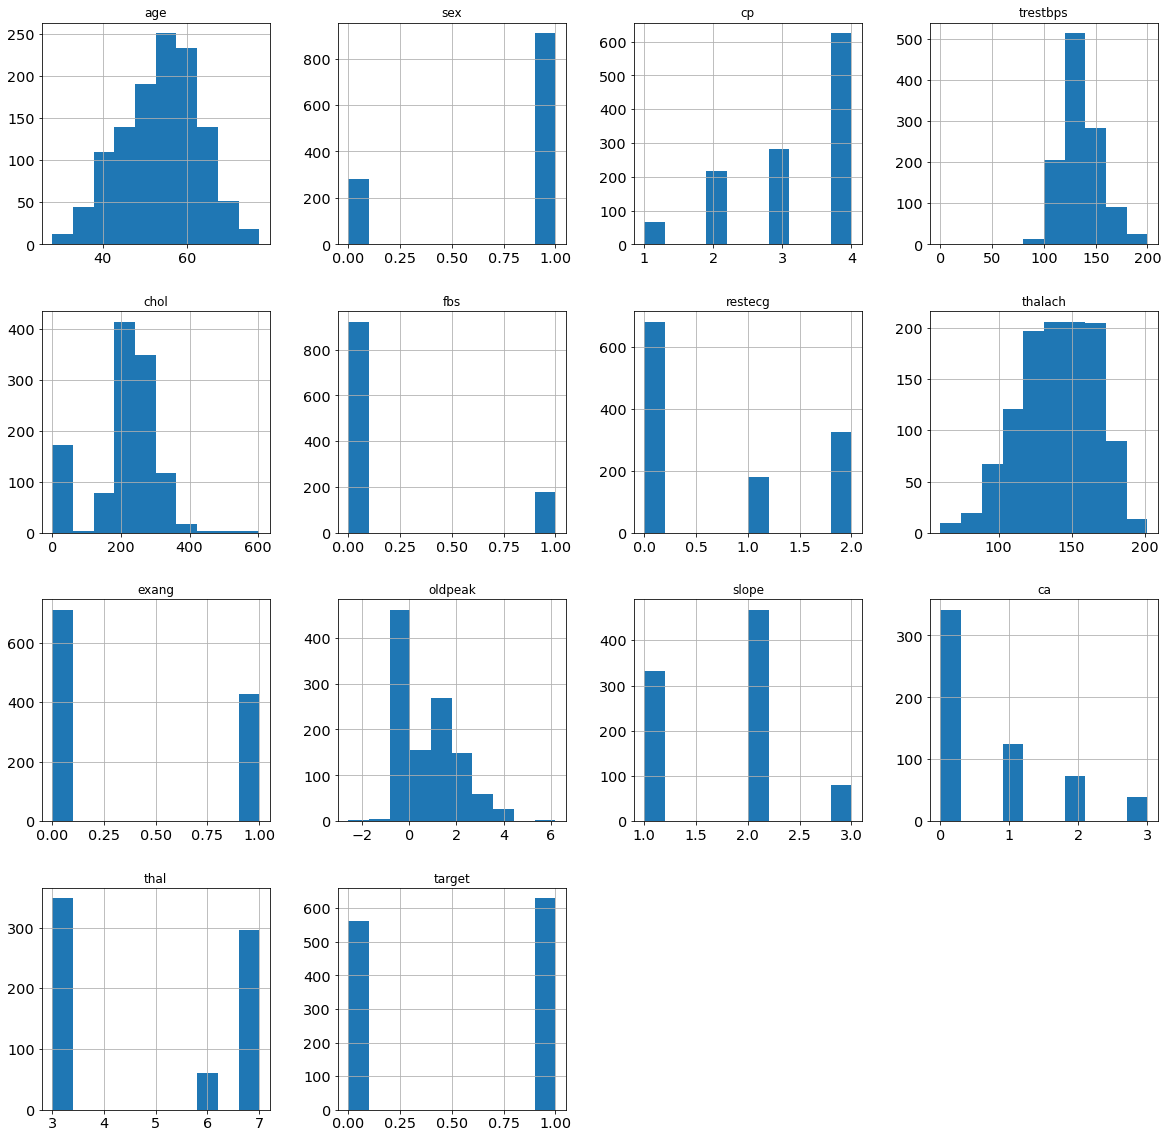

In [11]:
# Cek Distribusi Plot dengan Histogram
plot = data.hist(figsize = (20,20))

In [12]:
print("Skew: {}".format(data[num].skew())) 
#setelah dilihat nilai skew kecil lebih baik tidak perlu dilakukan normalisasi

Skew: age        -0.19
trestbps    0.32
chol       -0.79
thalach    -0.30
oldpeak     1.10
dtype: float64


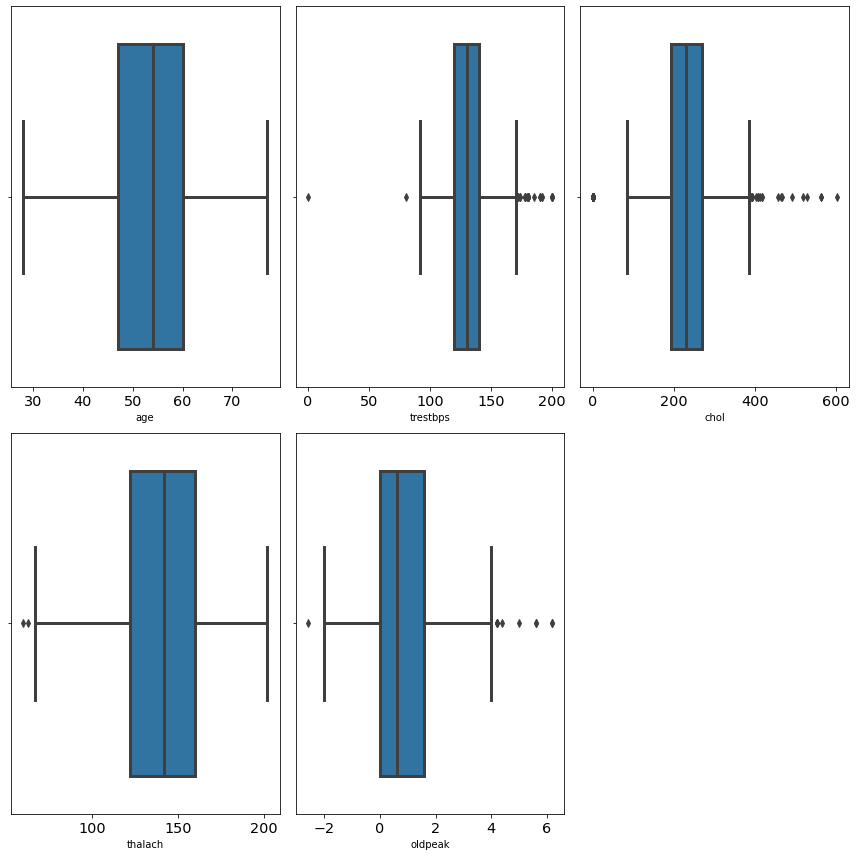

In [13]:
plt.figure(figsize=(12, 12))
for i in range(0, len(num)):
  plt.subplot(2, 3, i+1)
  sns.boxplot(data[num[i]], orient='v')
  plt.tight_layout()

dari data terdapat outlyer, namun hal tersebut dapat dihiraukan karena memang nilai dari pemeriksaan sebenarnya, dan kemungkinan tidak mengganggu model

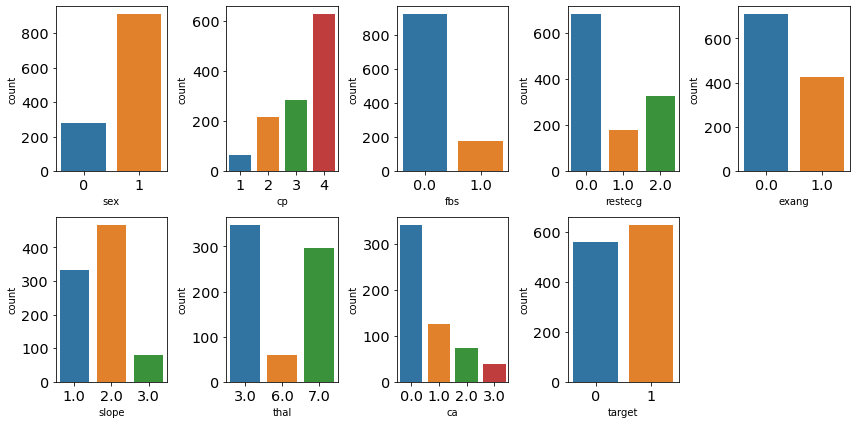

In [14]:
for i in range(0, len(cat)):
  plt.subplot(2, 5, i+1)
  sns.countplot(data[cat[i]], orient="v")
  plt.tight_layout()

1. Banyak pasien berjenis kelamin laki-laki,
2. tipe chest pain terdapat empat yaitu typical angina (1), atypical angina (2), non-anginal pain(3), asymptomatic angina(4) dengan 
3.  fbs tes gula darah setelah berpuasa kategori 0 dibawah 120 sedangkan kategori 1 diatas 120mg/dl hal ini melihat seberapa besar orang yang mengalami penyakit jantung menderita diabetes. dari data set lebih banyak yang tidak memiliki penyakit diabetes.
4. restecg = resting electrocardiographic (0 normal) (1 ST-T wave abnormality) (2 left ventricular hypertophy)
5. exang exercised induced angina, keluhan angina ketika melakukan olahraga 0 tidak 1 iya
6. resting electrocardiogram 0 normal, 1 ST-T wave abnormality 2 left ventricular hypertrophy
7. thal type defect jantung, 3 normal, 6 fixed defect, 7 reversable defect

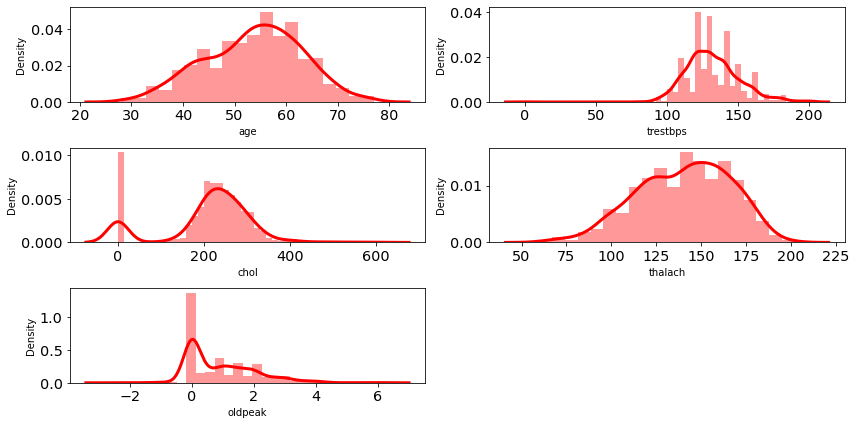

In [15]:
for i in range(0, len(num)):
  plt.subplot(3, len(num)/2, i+1)
  sns.distplot(data[num[i]], color="red")
  plt.tight_layout()

distribusi dari data numerikal ialah skew positif

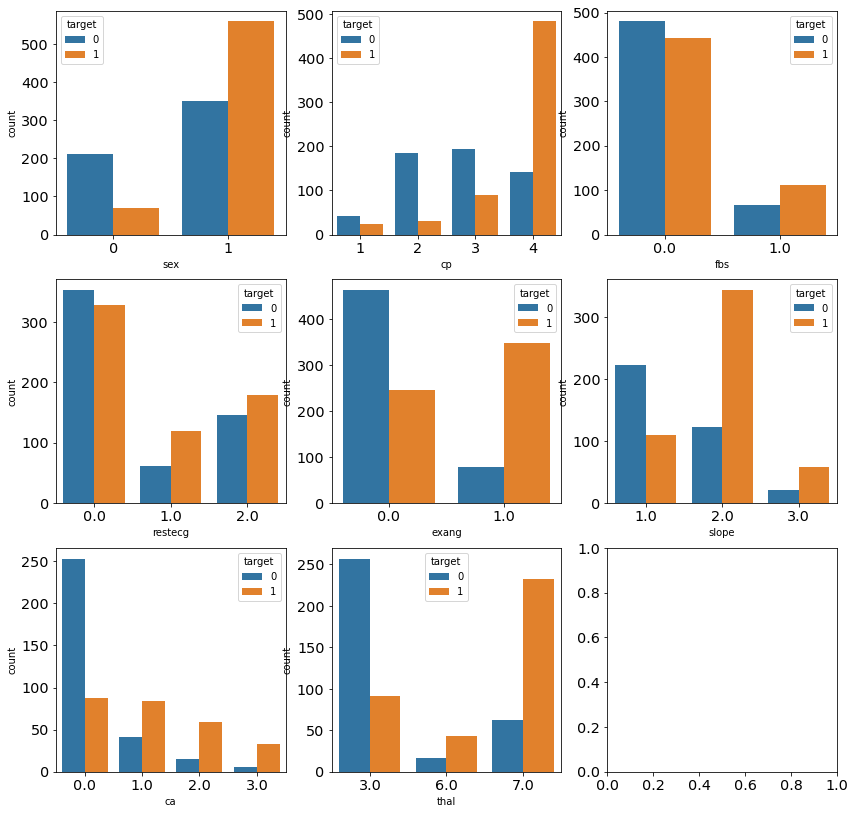

In [16]:
fig, ax =plt.subplots(nrows=3,ncols=3,figsize=(14,14))
sns.countplot('sex',hue='target',data=data,ax=ax[0,0])
sns.countplot('cp',hue='target',data=data,ax=ax[0,1])
sns.countplot('fbs',hue='target',data=data,ax=ax[0,2])
sns.countplot('restecg',hue='target',data=data,ax=ax[1,0])
sns.countplot('exang',hue='target',data=data,ax=ax[1,1])
sns.countplot('slope',hue='target',data=data,ax=ax[1,2])
sns.countplot('ca',hue='target',data=data,ax=ax[2,0])
sns.countplot('thal',hue='target',data=data,ax=ax[2,1])
plt.show()

1. Penderita serangan jantung kebanyakan dari jenis kelamin pria, hal ini disebabkan adanya hormonestrogen pada cewek dan pria memiliki kecenderungan tingkat stress yang lebih tinggi.
2. penderita chest pain angina memiliki kecenderungan untuk terkenan serangan jantung
3. nilai gula darah tidak terlalu mempengaruhi penyebab serangan jantung dapat terlihat dari fbs
4. orang yang memiliki angina dan berolahraga cenderung terkenan serangan jantung
5. 

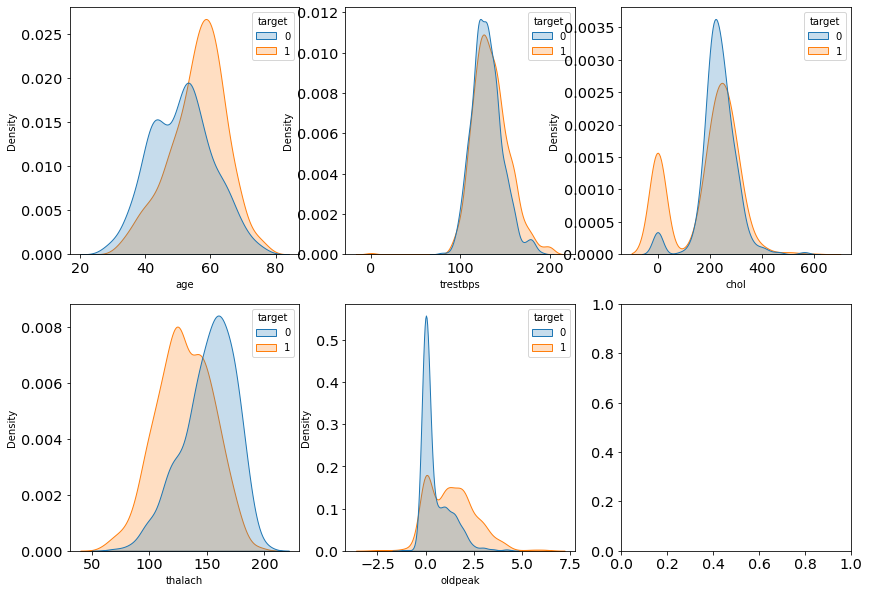

In [22]:
fig, ax =plt.subplots(nrows=2,ncols=3,figsize=(14,10))
sns.kdeplot('age',hue='target',data=data,shade = True, ax=ax[0,0])
sns.kdeplot("trestbps",hue='target',data=data,shade = True, ax=ax[0,1])
sns.kdeplot("chol", hue='target',data=data,shade = True, ax=ax[0,2])
sns.kdeplot("thalach",hue='target',data=data,shade = True, ax=ax[1,0])
sns.kdeplot("oldpeak",hue='target',data=data,shade = True, ax=ax[1,1])
plt.show()

1. rata-rata umur penyakit pasien jantung skitar 50 tahun ke atas dan memiliki puncak di angka 60
2. orang yang berpeyakit jantung biasanya memiliki denyut jantung yang lebih kecil dibandingkan dengan orang normal

### Bivariate analysis

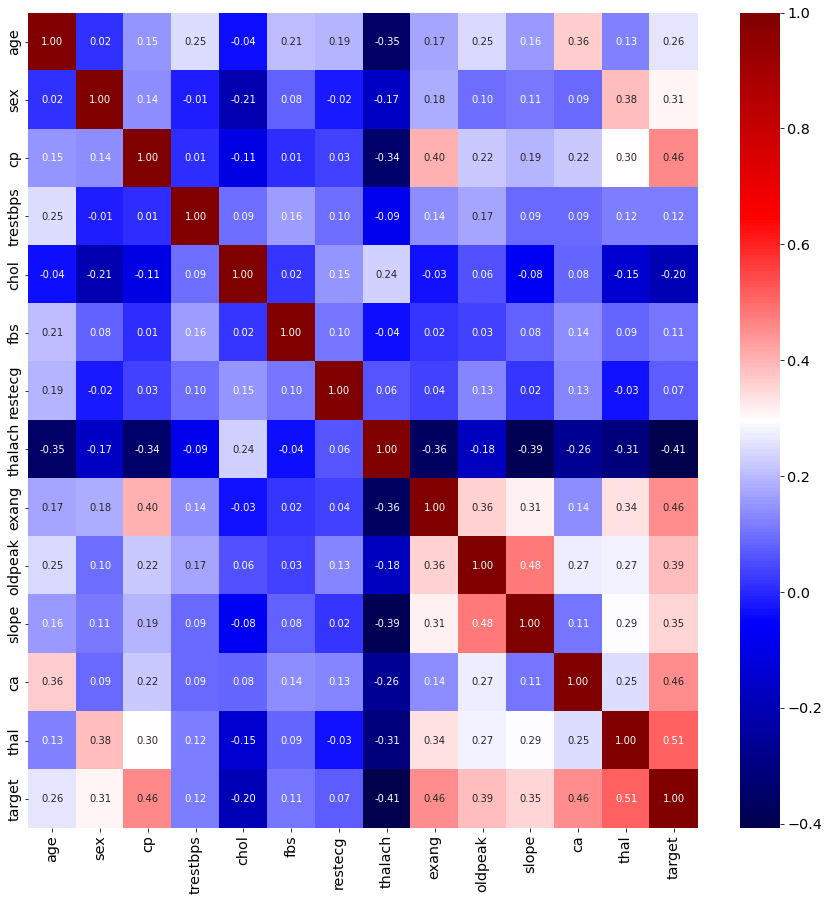

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="seismic", annot=True, fmt=".2f")

restecg memiliki corelasi dengan target yang paling kecil
nilai cholesterol dan fbs juga memiliki korelasi yang cukup kecil
nilai maximum heat rate memiliki korelasi negatif yang besar terhadap target
old peak dan slope memiliki korelasi yang besar, salah satu kolom dapat di drop

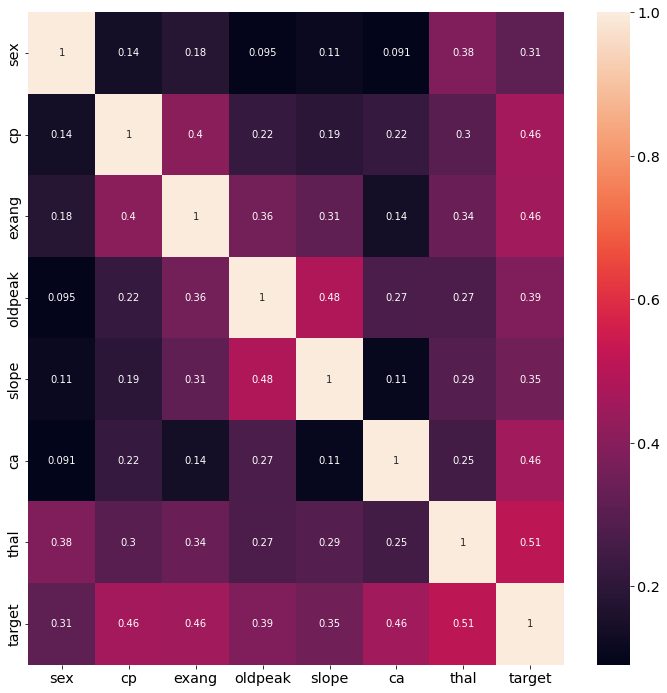

In [26]:
#Korelasi diatas 0.3
plt.figure(figsize=(12,12))
sns.heatmap(data[["sex","cp","exang","oldpeak","slope","ca","thal","target"]].corr(), annot=True)

pair plot

<Figure size 720x720 with 0 Axes>

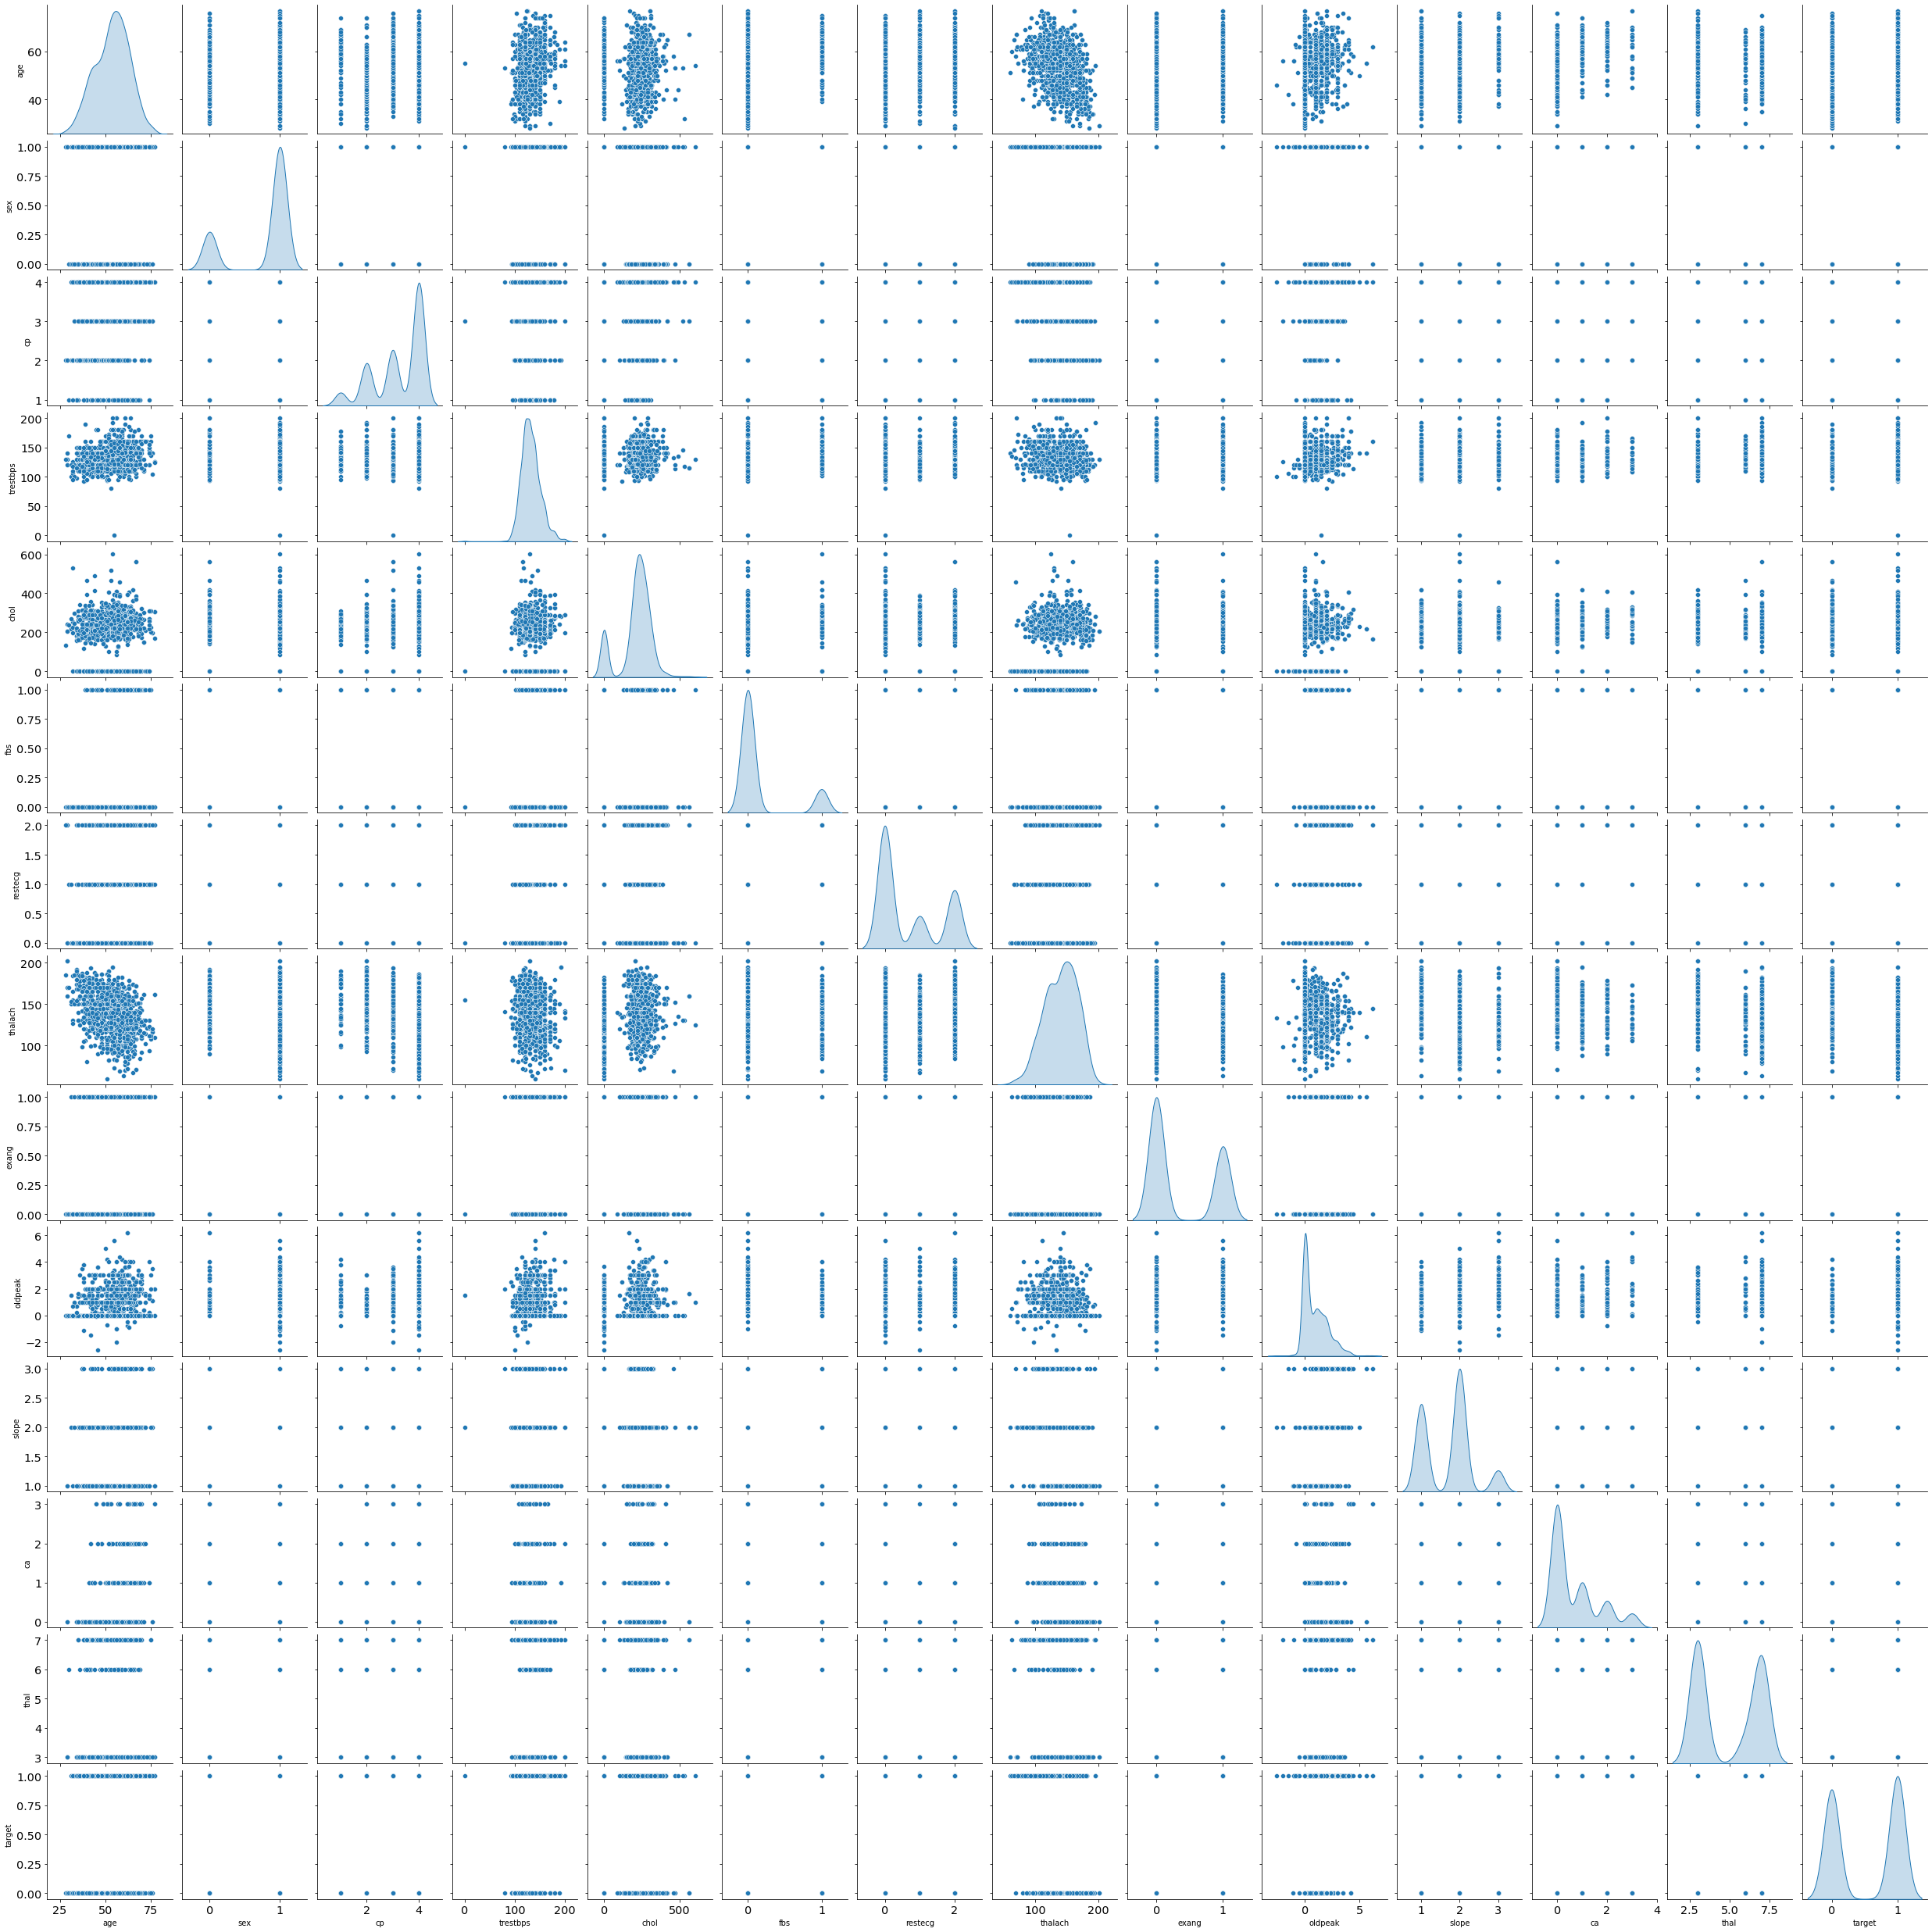

In [27]:
plt.figure(figsize=(10,10))
sns.pairplot(data, diag_kind="kde")

pair plot

<Figure size 1440x1440 with 0 Axes>

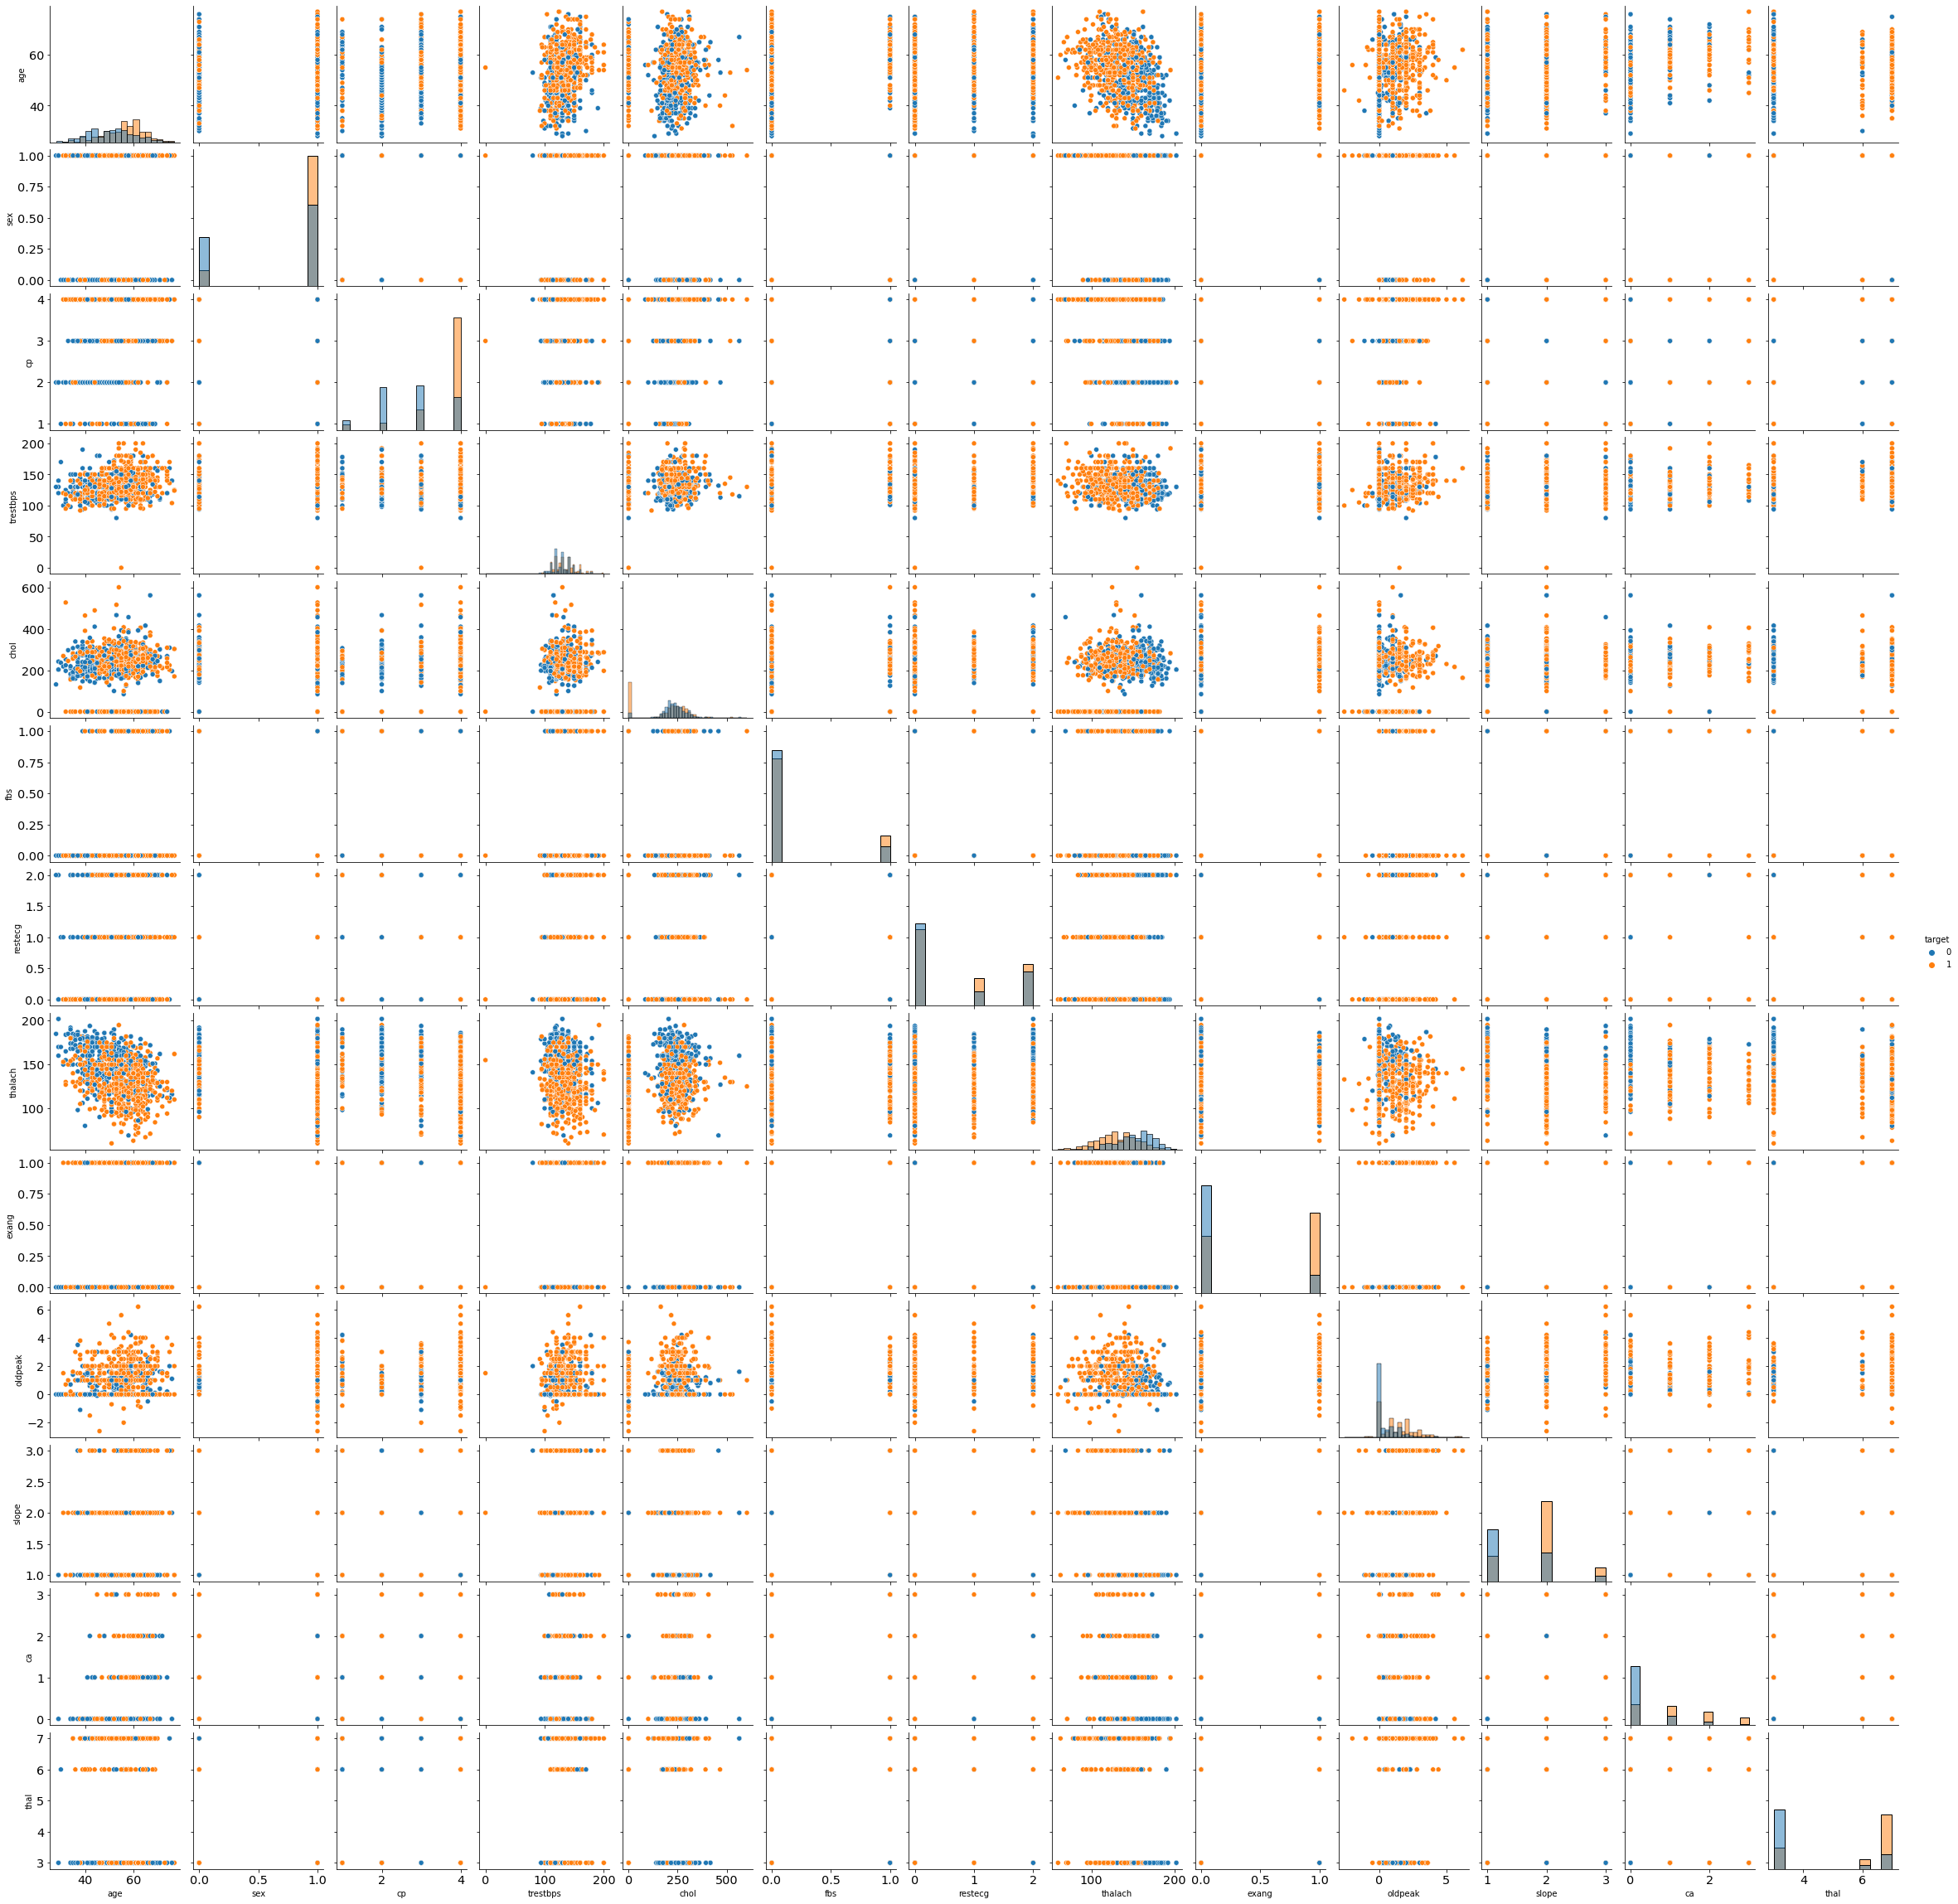

In [28]:
plt.figure(figsize=(20,20))
sns.pairplot(data, hue="target", diag_kind="hist")

## Data Preparation

### Data Cleaning

Handling mising value using knn imputer

In [29]:
data1 = data.copy()

In [30]:
for i in range(data1.shape[1]):
	n_miss = data1.iloc[:, i].isnull().sum()
	perc = n_miss / data1.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 59 (5.0%)
> 4, Missing: 30 (2.5%)
> 5, Missing: 90 (7.6%)
> 6, Missing: 2 (0.2%)
> 7, Missing: 55 (4.6%)
> 8, Missing: 55 (4.6%)
> 9, Missing: 62 (5.2%)
> 10, Missing: 309 (26.0%)
> 11, Missing: 611 (51.3%)
> 12, Missing: 486 (40.8%)
> 13, Missing: 0 (0.0%)


In [31]:
x = data1.drop('target', axis=1)
y = data1['target']

In [32]:
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]

>1 0.883 (0.028)
>3 0.887 (0.028)
>5 0.890 (0.029)
>7 0.886 (0.031)
>9 0.885 (0.032)
>15 0.884 (0.028)
>18 0.890 (0.031)
>21 0.890 (0.032)


{'boxes': [<matplotlib.lines.Line2D at 0x7f77c2c7fb10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77c2afe890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f77c2e7db50>,
 'means': [<matplotlib.lines.Line2D at 0x7f77c2e7d050>,
 'medians': [<matplotlib.lines.Line2D at 0x7f77c2ec6750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f77c2af2a90>,
  <matplotlib.lines.Line2D at 0x7f77c2983bd0>]}

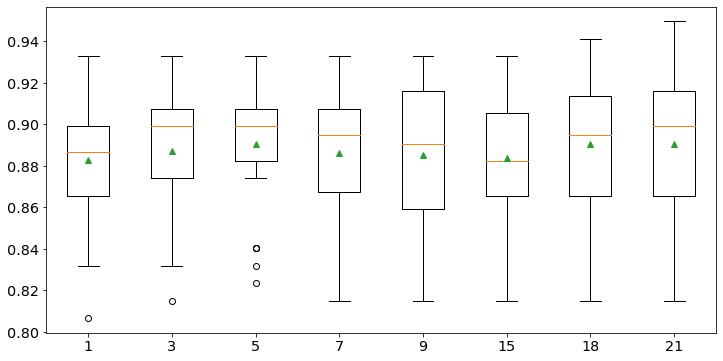

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt

for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)

In [34]:
from numpy import isnan
imputer = KNNImputer(n_neighbors=18)
# fit on the dataset
imputer.fit(x)
# transform the dataset
Xtrans = imputer.transform(x)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [35]:
Xtrans

array([[70.        ,  1.        ,  4.        , ...,  2.        ,
         3.        ,  3.        ],
       [67.        ,  0.        ,  3.        , ...,  2.        ,
         0.        ,  7.        ],
       [57.        ,  1.        ,  2.        , ...,  1.        ,
         0.        ,  7.        ],
       ...,
       [55.        ,  1.        ,  4.        , ...,  2.11111111,
         0.66666667,  6.        ],
       [58.        ,  1.        ,  4.        , ...,  1.88888889,
         0.77777778,  4.94444444],
       [62.        ,  1.        ,  2.        , ...,  2.11111111,
         1.        ,  6.11111111]])

In [36]:
df = pd.DataFrame(Xtrans)
result = pd.concat([df, y], axis=1, join='inner')
result.columns=["age","sex","cp",	"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"] 
result.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.00,1.00,4.00,130.00,322.00,0.00,2.00,109.00,0.00,2.40,2.00,3.00,3.00,1
1,67.00,0.00,3.00,115.00,564.00,0.00,2.00,160.00,0.00,1.60,2.00,0.00,7.00,0
2,57.00,1.00,2.00,124.00,261.00,0.00,0.00,141.00,0.00,0.30,1.00,0.00,7.00,1
3,64.00,1.00,4.00,128.00,263.00,0.00,0.00,105.00,1.00,0.20,2.00,1.00,7.00,0
4,74.00,0.00,2.00,120.00,269.00,0.00,2.00,121.00,1.00,0.20,1.00,1.00,3.00,0


In [37]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   float64
 1   sex       1190 non-null   float64
 2   cp        1190 non-null   float64
 3   trestbps  1190 non-null   float64
 4   chol      1190 non-null   float64
 5   fbs       1190 non-null   float64
 6   restecg   1190 non-null   float64
 7   thalach   1190 non-null   float64
 8   exang     1190 non-null   float64
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   float64
 11  ca        1190 non-null   float64
 12  thal      1190 non-null   float64
 13  target    1190 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 130.3 KB


Cek duplikasi

In [38]:
print(result.duplicated().sum())

272


Visualisasi Data setelah di cleaning

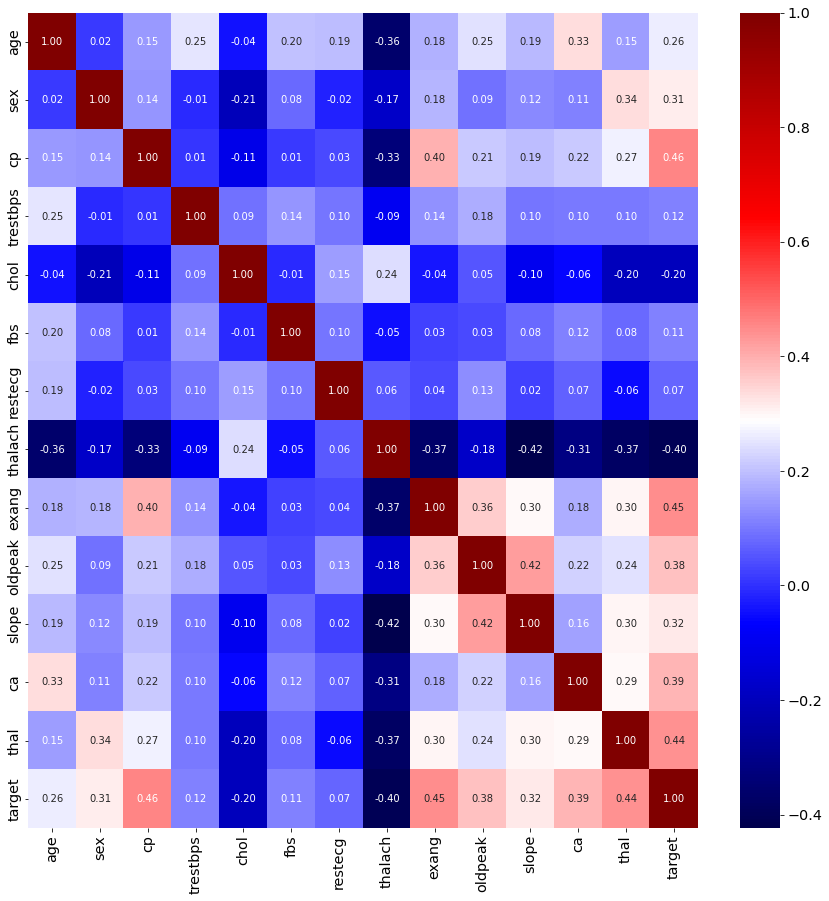

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(result.corr(), cmap="seismic", annot=True, fmt=".2f")

Standarisasi data using standardscaller

In [40]:
x1 = result.drop('target', axis=1)
y1= result['target']

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x1)

In [43]:
X = pd.DataFrame(X, columns=x1.columns)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.74,0.56,0.82,-0.11,1.10,-0.47,1.50,-1.22,-0.80,1.37,0.50,3.22,-1.33
1,1.42,-1.80,-0.25,-0.93,3.49,-0.47,1.50,0.79,-0.80,0.63,0.50,-1.05,1.17
2,0.35,0.56,-1.32,-0.44,0.50,-0.47,-0.80,0.04,-0.80,-0.57,-1.30,-1.05,1.17
3,1.10,0.56,0.82,-0.22,0.52,-0.47,-0.80,-1.38,1.31,-0.67,0.50,0.37,1.17
4,2.17,-1.80,-1.32,-0.66,0.57,-0.47,1.50,-0.75,1.31,-0.67,-1.30,0.37,-1.33


### Feature Engineering

Lasso correlation

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=65)

In [198]:
X_train.shape

(952, 13)

In [199]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [200]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [201]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.162, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.167, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.159, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.160, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.168, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.227, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... model__alpha=0.4, score=-0.247, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................... model__alpha=0.4, score=-0.248, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................... model__alpha=0.4, score=-0.252, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................... model__alpha=0.5, score=-0.249, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................... model__alpha=0.5, score=-0.253, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................... model__alpha=0.5, score=-0.247, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................... model__alpha=0.5, score=-0.248, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    6.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [202]:
search.best_params_

{'model__alpha': 0.1}

In [203]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients 

array([ 0.        ,  0.00337339,  0.07308542,  0.        , -0.        ,
        0.        ,  0.        , -0.02851923,  0.05301636,  0.02012781,
        0.        ,  0.0345988 ,  0.06448613])

In [204]:
importance = np.abs(coefficients)

In [205]:
labels = x.columns
labels

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [206]:
np.array(labels)[importance > 0]

array(['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal'],
      dtype=object)

In [207]:
np.array(labels)[importance == 0]

array(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'slope'], dtype=object)

In [208]:
#10 features
lasso_df = X[["age", "sex", "cp","trestbps", "fbs", "thalach", "exang", "oldpeak", "ca", "thal","restecg"]]

Fitur Wajib: age, sex, trestbps, fbs, cp, restecg

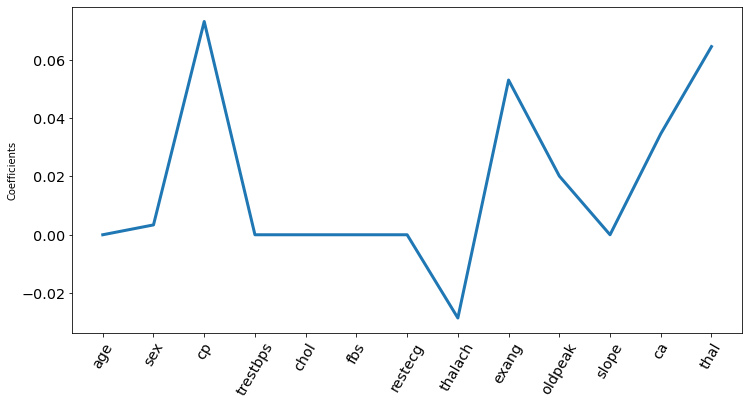

In [58]:
_=plt.plot(range(len(labels)),coefficients)
_=plt.xticks(range(len(labels)),labels,rotation=60)
_=plt.ylabel("Coefficients")
plt.show()

Pearson corr


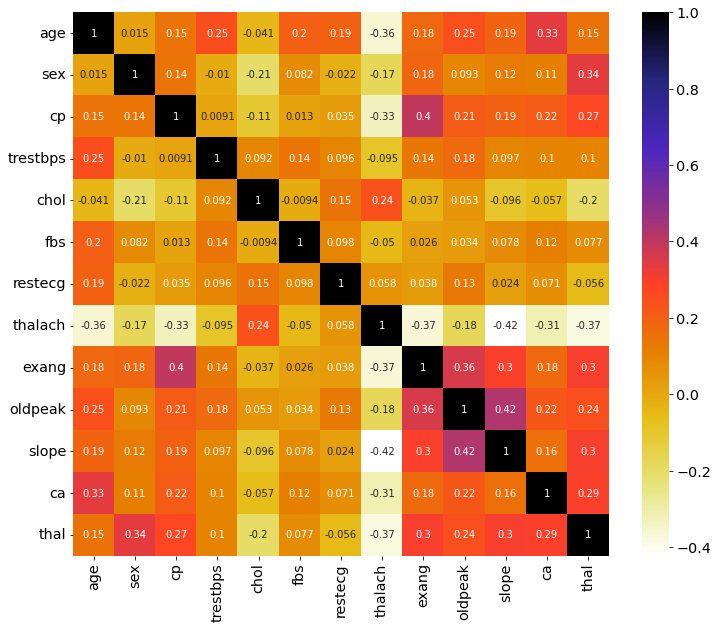

In [59]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [60]:
#Memilih fitur-fiturnya yang berkolerasi tinggi kemudian menghapus fitur-fitur tersebut
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [61]:
corr_features = correlation(X, 0.4)
len(set(corr_features))

1

In [62]:
corr_features

{'slope'}

In [63]:
X_corr = X.copy()

In [64]:
X_corr = X_corr.drop(corr_features,axis=1)

In [65]:
X_corr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal
0,1.74,0.56,0.82,-0.11,1.10,-0.47,1.50,-1.22,-0.80,1.37,3.22,-1.33
1,1.42,-1.80,-0.25,-0.93,3.49,-0.47,1.50,0.79,-0.80,0.63,-1.05,1.17
2,0.35,0.56,-1.32,-0.44,0.50,-0.47,-0.80,0.04,-0.80,-0.57,-1.05,1.17
3,1.10,0.56,0.82,-0.22,0.52,-0.47,-0.80,-1.38,1.31,-0.67,0.37,1.17
4,2.17,-1.80,-1.32,-0.66,0.57,-0.47,1.50,-0.75,1.31,-0.67,0.37,-1.33


## Modelling

In [80]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [81]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model, z):
    feat_importances = pd.Series(model.feature_importances_, index=z.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Lazy Classifier

lasso

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(lasso_df, y1, test_size=0.2, random_state=75)

In [67]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(xtrain, xtest, ytrain, ytest)
models

100%|██████████| 29/29 [00:02<00:00, 10.81it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.91,0.91,0.91,0.24
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.47
LGBMClassifier,0.88,0.88,0.88,0.88,0.09
LabelPropagation,0.88,0.88,0.88,0.88,0.09
XGBClassifier,0.88,0.88,0.88,0.88,0.23
LabelSpreading,0.88,0.88,0.88,0.88,0.10
SVC,0.86,0.86,0.86,0.86,0.08
ExtraTreeClassifier,0.86,0.86,0.86,0.86,0.03
DecisionTreeClassifier,0.85,0.85,0.85,0.85,0.02


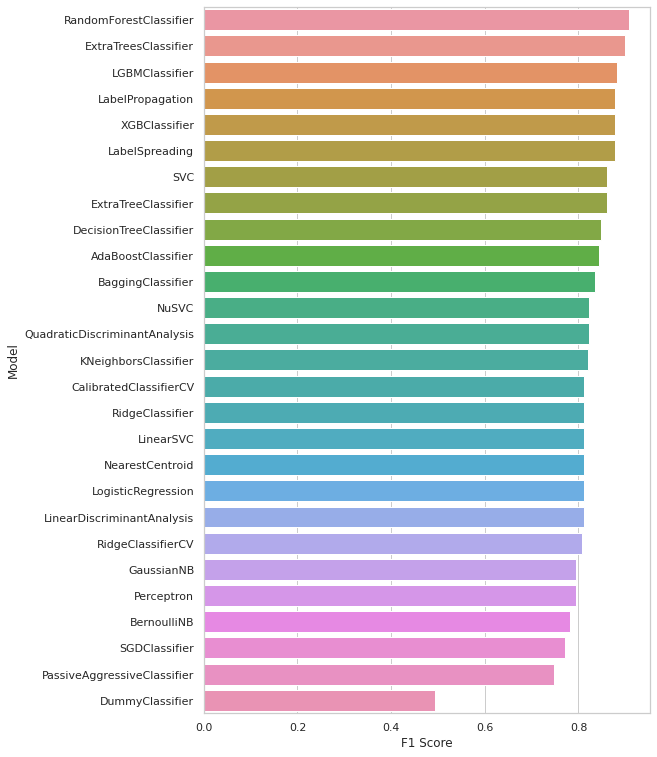

In [68]:
plt.figure(figsize=(8, 13))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="F1 Score", data=models)

all features

In [69]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X, y1, test_size=0.2, random_state=75)

In [70]:
clf = LazyClassifier(predictions=True)
models2 , predictions2 = clf.fit(xtrain2, xtest2, ytrain2, ytest2)
models2

100%|██████████| 29/29 [00:02<00:00, 12.35it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.89,0.89,0.89,0.89,0.10
ExtraTreesClassifier,0.89,0.89,0.89,0.89,0.31
XGBClassifier,0.89,0.89,0.89,0.89,0.12
RandomForestClassifier,0.89,0.89,0.89,0.89,0.24
LabelPropagation,0.89,0.89,0.89,0.89,0.10
LabelSpreading,0.89,0.89,0.89,0.89,0.15
SVC,0.85,0.85,0.85,0.85,0.06
BaggingClassifier,0.84,0.84,0.84,0.84,0.09
ExtraTreeClassifier,0.84,0.84,0.84,0.84,0.02


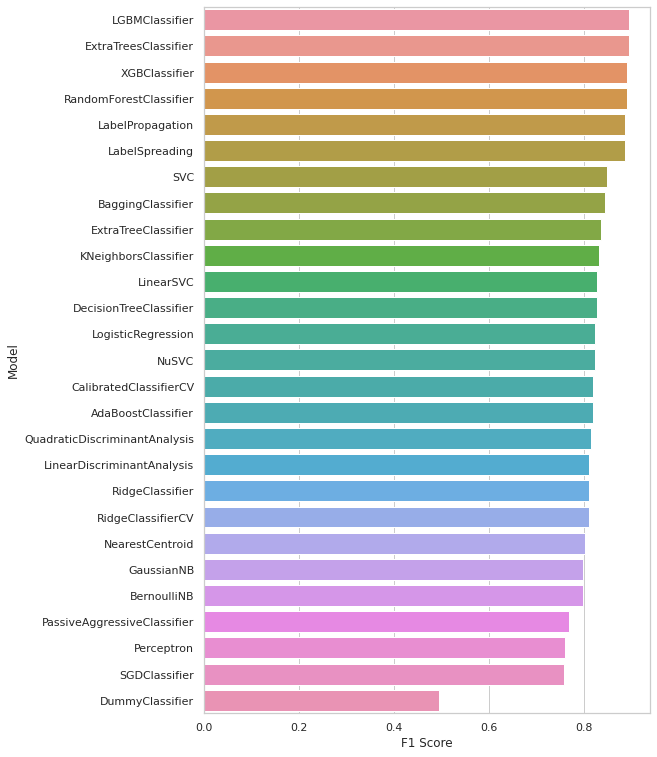

In [71]:
plt.figure(figsize=(8, 13))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models2.index, x="F1 Score", data=models2)

Pearson Corr

In [72]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X_corr, y1, test_size=0.2, random_state=75)

In [73]:
clf = LazyClassifier(predictions=True)
models1 , predictions1 = clf.fit(xtrain1, xtest1, ytrain1, ytest1)
models1

100%|██████████| 29/29 [00:02<00:00, 11.72it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.92,0.92,0.92,0.92,0.34
RandomForestClassifier,0.90,0.90,0.90,0.90,0.25
XGBClassifier,0.89,0.89,0.89,0.89,0.11
LGBMClassifier,0.89,0.89,0.89,0.89,0.09
LabelPropagation,0.89,0.89,0.89,0.89,0.08
LabelSpreading,0.89,0.89,0.89,0.89,0.12
ExtraTreeClassifier,0.87,0.87,0.87,0.87,0.02
BaggingClassifier,0.85,0.85,0.85,0.85,0.09
SVC,0.84,0.84,0.84,0.84,0.07


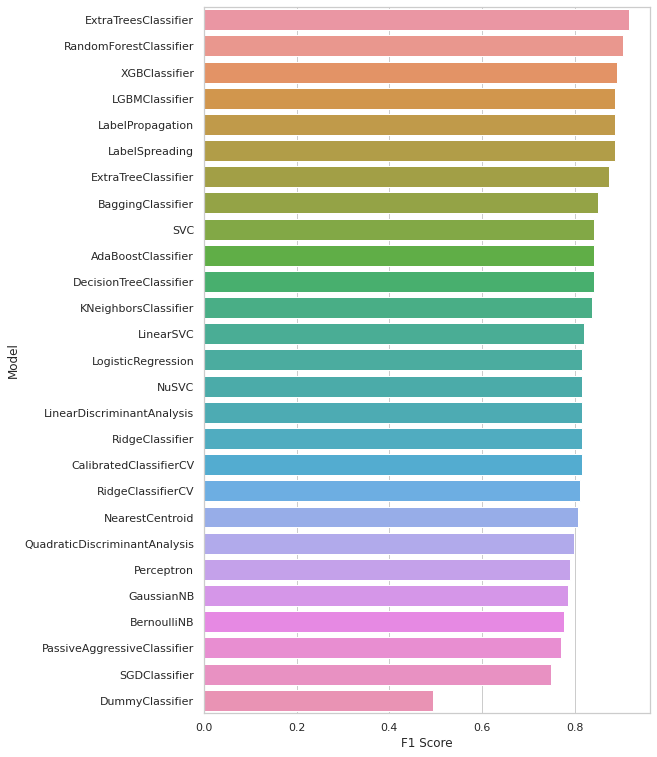

In [74]:
plt.figure(figsize=(8, 13))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models1.index, x="F1 Score", data=models1)

Relief versi paper

In [75]:
relief_notOver = X[["age", "sex", "cp","trestbps", "fbs", "thalach", "exang", "ca", "restecg", "chol"]]

In [76]:
xtrain3, xtest3, ytrain3, ytest3= train_test_split(relief_notOver, y1, test_size=0.2, random_state=75)

In [78]:
clf = LazyClassifier(predictions=True)
models_b , predictions_b = clf.fit(xtrain3, xtest3, ytrain3, ytest3)
models_b

100%|██████████| 29/29 [00:02<00:00, 10.76it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.90,0.90,0.90,0.90,0.37
RandomForestClassifier,0.89,0.89,0.89,0.89,0.42
LGBMClassifier,0.89,0.89,0.89,0.89,0.09
ExtraTreeClassifier,0.87,0.87,0.87,0.87,0.03
XGBClassifier,0.87,0.87,0.87,0.87,0.16
LabelPropagation,0.87,0.87,0.87,0.87,0.08
LabelSpreading,0.87,0.87,0.87,0.87,0.11
BaggingClassifier,0.84,0.84,0.84,0.84,0.09
NuSVC,0.82,0.82,0.82,0.82,0.10


### Randomforest classifier lasso df

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=35)
rf1.fit(xtrain, ytrain)

y_pred = rf1.predict(xtest)
eval_classification(rf1, y_pred,xtrain, ytrain1,xtest, ytest)

Accuracy (Test Set): 0.9118
Precision (Test Set): 0.9083
Recall (Test Set): 0.9160
F1-Score (Test Set): 0.9121
AUC: 0.91


### Random forest lasso df hyper parameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf_tuned = RandomizedSearchCV(rf1, hyperparameters, cv=6, random_state=42, scoring='recall')
rf_tuned.fit(xtrain, ytrain)



# Predict & Evaluation
y_pred1 = rf_tuned.predict(xtest)#Check performa dari model
eval_classification(rf_tuned, y_pred1,xtrain, ytrain1,xtest, ytest)
print(rf_tuned.best_params_)

Accuracy (Test Set): 0.8950
Precision (Test Set): 0.8852
Recall (Test Set): 0.9076
F1-Score (Test Set): 0.8963
AUC: 0.89
{'n_jobs': -1, 'n_estimators': 522, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': True}


### Lasso df Extra classifier

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
etc1 = ExtraTreesClassifier(random_state=23)
etc1.fit(xtrain,ytrain)

y_pred2 = etc1.predict(xtest)
eval_classification(etc1, y_pred2,xtrain, ytrain1,xtest, ytest)

Accuracy (Test Set): 0.9244
Precision (Test Set): 0.9174
Recall (Test Set): 0.9328
F1-Score (Test Set): 0.9250
AUC: 0.92


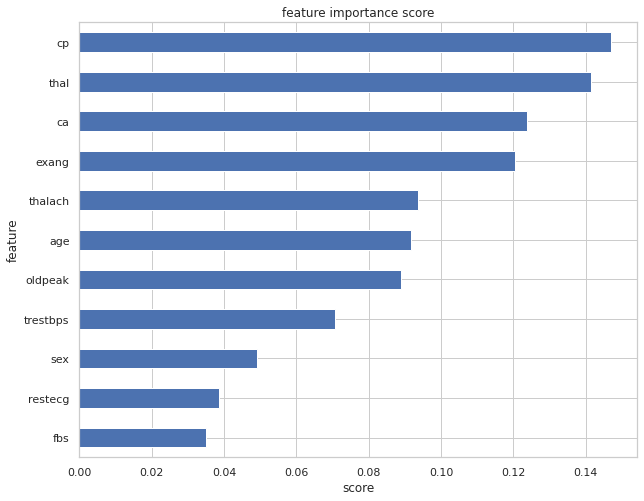

In [95]:
show_feature_importance(etc1, lasso_df)

extra classifier hyper parameter

In [91]:
#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
etc1_tuned1 = RandomizedSearchCV(etc1, hyperparameters, cv=3, random_state=75, scoring='recall')
etc1_tuned1.fit(xtrain, ytrain)

# Predict & Evaluation
y_pred3 = etc1_tuned1.predict(xtest)#Check performa dari model
eval_classification(etc1_tuned1, y_pred3,xtrain, ytrain, xtest, ytest)
print(etc1_tuned1.best_params_)

Accuracy (Test Set): 0.8908
Precision (Test Set): 0.8843
Recall (Test Set): 0.8992
F1-Score (Test Set): 0.8917
AUC: 0.89
{'n_jobs': -1, 'n_estimators': 2000, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'gini', 'bootstrap': True}


### Pearson corr randomforest

In [93]:
rf2 = RandomForestClassifier(random_state=53)
rf2.fit(xtrain1, ytrain1)

y_pred4 = rf2.predict(xtest1)
eval_classification(rf2, y_pred4,xtrain1, ytrain1, xtest1, ytest1)

Accuracy (Test Set): 0.9118
Precision (Test Set): 0.8952
Recall (Test Set): 0.9328
F1-Score (Test Set): 0.9136
AUC: 0.91


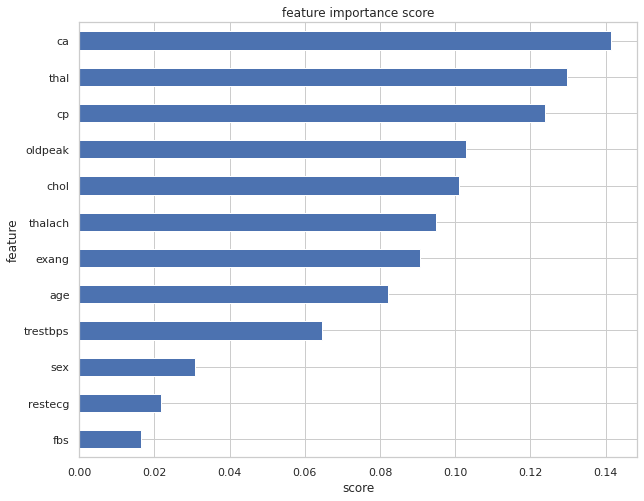

In [94]:
show_feature_importance(rf2,X_corr)

hyperparameter tuning

In [107]:
rf_tuned1 = RandomizedSearchCV(rf2, hyperparameters, cv=6, random_state=34, scoring='recall')
rf_tuned1.fit(xtrain1, ytrain1)



# Predict & Evaluation
y_pred5 = rf_tuned1.predict(xtest1)#Check performa dari model
eval_classification(rf_tuned1, y_pred5, xtrain1, ytrain1, xtest1, ytest1)
print(rf_tuned1.best_params_)

Accuracy (Test Set): 0.8866
Precision (Test Set): 0.8770
Recall (Test Set): 0.8992
F1-Score (Test Set): 0.8880
AUC: 0.89
{'n_jobs': -1, 'n_estimators': 1788, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'entropy', 'bootstrap': True}


### Pearson correlation extraclassifier

In [108]:
etc2 = ExtraTreesClassifier(random_state=11)
etc2.fit(xtrain1,ytrain1)

y_pred6 = etc2.predict(xtest1)
eval_classification(rf2, y_pred6,xtrain1, ytrain1, xtest1, ytest1)

Accuracy (Test Set): 0.9034
Precision (Test Set): 0.8934
Recall (Test Set): 0.9160
F1-Score (Test Set): 0.9046
AUC: 0.90


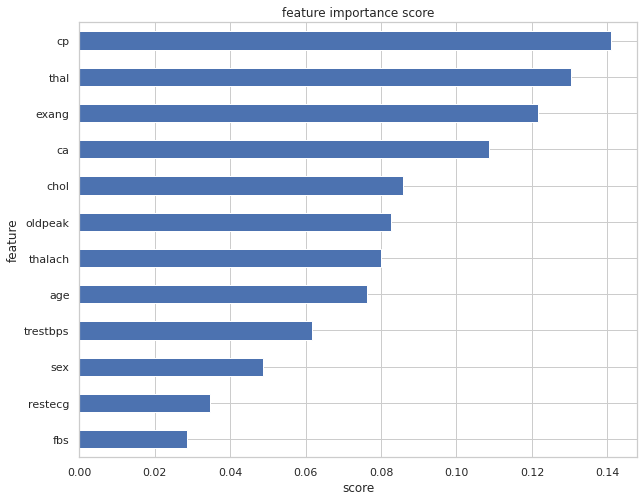

In [114]:
show_feature_importance(etc2,X_corr)

hyperparameter tuning

In [115]:
etc_tuned2 = RandomizedSearchCV(etc2, hyperparameters, cv=6, random_state=34, scoring='recall')
etc_tuned2.fit(xtrain1, ytrain1)



# Predict & Evaluation
y_pred7 = etc_tuned2.predict(xtest1)#Check performa dari model
eval_classification(rf_tuned1, y_pred7, xtrain1, ytrain1, xtest1, ytest1)
print(rf_tuned1.best_params_)

Accuracy (Test Set): 0.8824
Precision (Test Set): 0.8760
Recall (Test Set): 0.8908
F1-Score (Test Set): 0.8833
AUC: 0.88
{'n_jobs': -1, 'n_estimators': 1788, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
show_feature_importance(etc2_tuned,X_corr)

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'n_estimators': [522], 'min_samples_split': [6], 'min_samples_leaf': [1], 'max_features': ['sqrt'], 'max_depth': [60], 'criterion': ['entropy'], 'bootstrap': [True]}



g_search = GridSearchCV(estimator = etc2, param_grid = param_grid1, cv=3,n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(xtrain1, ytrain1);
y_pred8 = g_search.predict(xtest1)#Check performa dari model
eval_classification(g_search, y_pred8, xtrain1, ytrain1, xtest1, ytest1)
print(g_search.best_params_)

Accuracy (Test Set): 0.8782
Precision (Test Set): 0.8689
Recall (Test Set): 0.8908
F1-Score (Test Set): 0.8797
AUC: 0.88
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 522}


### Relief random classifier

In [119]:
rf3 = RandomForestClassifier(random_state=21)
rf3.fit(xtrain3, ytrain3)

y_pred9 = rf3.predict(xtest3)
eval_classification(rf3, y_pred9,xtrain3, ytrain3, xtest3, ytest3)

Accuracy (Test Set): 0.8908
Precision (Test Set): 0.8843
Recall (Test Set): 0.8992
F1-Score (Test Set): 0.8917
AUC: 0.89


In [121]:
rf_tuned2 = RandomizedSearchCV(rf3, hyperparameters, cv=6, random_state=34, scoring='recall')
rf_tuned2.fit(xtrain3, ytrain3)



# Predict & Evaluation
y_pred10 = rf_tuned2.predict(xtest3)#Check performa dari model
eval_classification(rf_tuned2, y_pred10, xtrain3, ytrain3, xtest3, ytest3)
print(rf_tuned2.best_params_)

Accuracy (Test Set): 0.8824
Precision (Test Set): 0.8640
Recall (Test Set): 0.9076
F1-Score (Test Set): 0.8852
AUC: 0.88
{'n_jobs': -1, 'n_estimators': 1788, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'entropy', 'bootstrap': True}


## Modelling using keras

In [191]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

### lasso_df

In [218]:
modelseq11 = Sequential()
modelseq11.add(Dense(12, input_dim=11, activation='relu'))
modelseq11.add(Dense(8, activation='relu'))
modelseq11.add(Dense(1, activation='sigmoid'))
modelseq11.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [221]:
modelseq11.fit(lasso_df, y1, epochs=200, batch_size=10)

Epoch 1/200
119/119 [==============================] - 1s 4ms/step - loss: 0.2208 - accuracy: 0.9168
Epoch 2/200
119/119 [==============================] - 1s 4ms/step - loss: 0.2191 - accuracy: 0.9160
Epoch 3/200
119/119 [==============================] - 1s 4ms/step - loss: 0.2199 - accuracy: 0.9176
Epoch 4/200
119/119 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.9168
Epoch 5/200
119/119 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9218
Epoch 6/200
119/119 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9227
Epoch 7/200
119/119 [==============================] - 1s 5ms/step - loss: 0.2178 - accuracy: 0.9160
Epoch 8/200
119/119 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9202
Epoch 9/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9185
Epoch 10/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2159 - accura

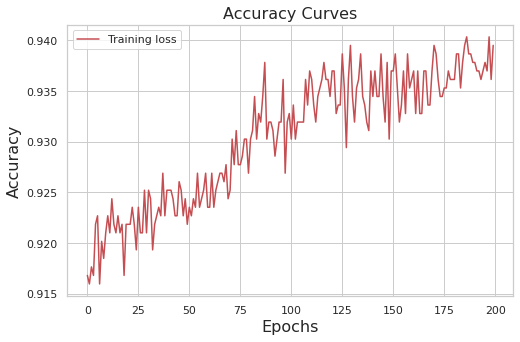

In [222]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(modelseq11.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [223]:
# evaluate the keras model
_, accuracy = modelseq11.evaluate(xtest, ytest, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') #SKOR AKURASI TERTINGGI DIDEEP LEARNING

Accuracy: 95.38


### Relief df

In [141]:
modelseq2 = Sequential()
modelseq2.add(Dense(12, input_dim=10, activation='relu'))
modelseq2.add(Dense(8, activation='relu'))
modelseq2.add(Dense(1, activation='sigmoid'))
modelseq2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
modelseq2.fit(relief_notOver, y1, epochs=200, batch_size=10)

Epoch 1/200
119/119 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9059
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9042
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9025
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9084
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9109
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9067
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9067
Epoch 8/200
119/119 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9109
Epoch 9/200
119/119 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9084
Epoch 10/200
119/119 [==============================] - 0s 2ms/step - loss: 0.2256 - accura

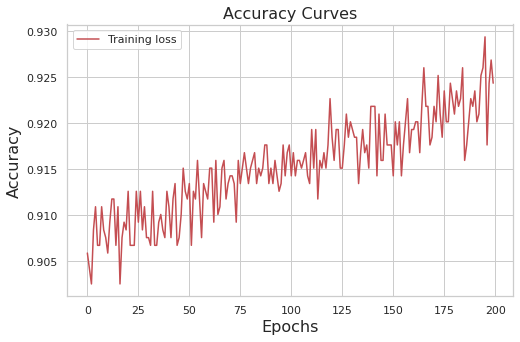

In [151]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(modelseq2.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()



In [152]:
# evaluate the keras model
_, accuracy = modelseq2.evaluate(xtest3, ytest3, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') #SKOR AKURASI TERTINGGI DIDEEP LEARNING

Accuracy: 93.28


### Pearson correlation 

In [153]:
modelseq3 = Sequential()
modelseq3.add(Dense(12, input_dim=12, activation='relu'))
modelseq3.add(Dense(8, activation='relu'))
modelseq3.add(Dense(1, activation='sigmoid'))
modelseq3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
modelseq3.fit(X_corr, y1, epochs=200, batch_size=10)

Epoch 1/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9412
Epoch 2/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9420
Epoch 3/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9403
Epoch 4/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9420
Epoch 5/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9412
Epoch 6/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9429
Epoch 7/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.9420
Epoch 8/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9437
Epoch 9/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9462
Epoch 10/200
119/119 [==============================] - 0s 2ms/step - loss: 0.1379 - accura

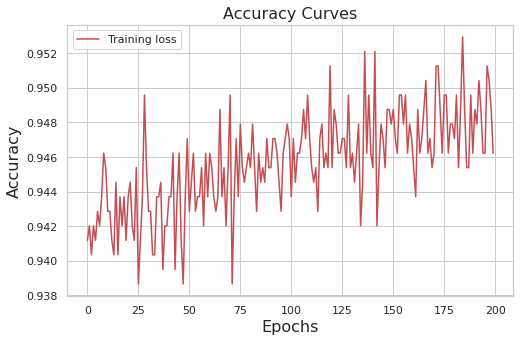

In [188]:
#TITIK OPTIMUM
plt.figure(figsize=[8,5])
plt.plot(modelseq3.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [189]:
# evaluate the keras model
_, accuracy = modelseq3.evaluate(xtest1, ytest1, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}') #SKOR AKURASI TERTINGGI DIDEEP LEARNING

Accuracy: 94.96


## Model Deployment

### Save modell

In [225]:
modelseq11.save("Predict_Heart_diesesase1.h5")
modelseq3.save("Predict_Heart_diesesase2.h5")

In [164]:
!pip install joblib

In [166]:
import joblib



In [226]:
joblib_file = "predict_model_heart_deasese_Extraclassifier.pkl"
joblib.dump(etc1, joblib_file)

['predict_model_heart_deasese_Extraclassifier.pkl']

### fungsi input